### Predicting Credit Card Defaults

#### How the 'Balance' on the credit card, Not the customer's level of 'Income', Tells the Real Story about credit card default 

This code explores why some people default on their credit card debt using a dataset called “Default.” from the {ISLR} library. Since there are way more people who paid their debt (non-defaulters) than those who didn’t (defaulters), the code balances things out by keeping all 333 defaulters and randomly selecting 333 non-defaulters for a fair comparison. It then creates charts to show how credit card balance and income relate to defaulting. The analysis finds that people with higher credit card balances are statistically more likely to default, while income level doesn’t have much of an effect.

In [2]:
# For data manipulation
import pandas as pd
import numpy as np
import seaborn as sns # contains diamonds dataset

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [ ]:
# pip install ISLP # contains 'Default' dataset

In [3]:
# Load the Default dataset
from ISLP import load_data
default = load_data('Default')
default.head(3)

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947


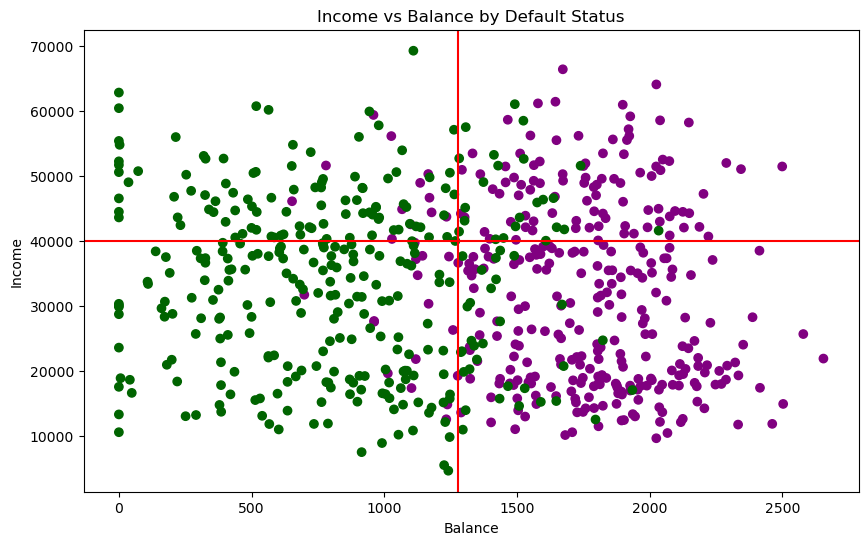

/Users/apple/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


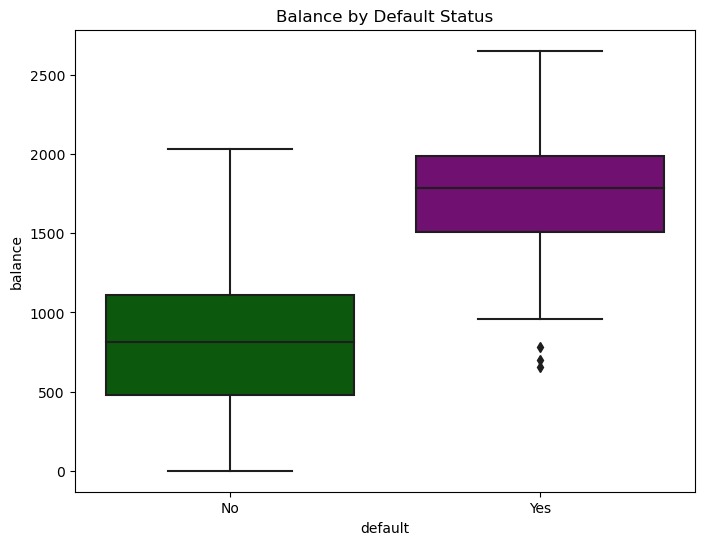

/Users/apple/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


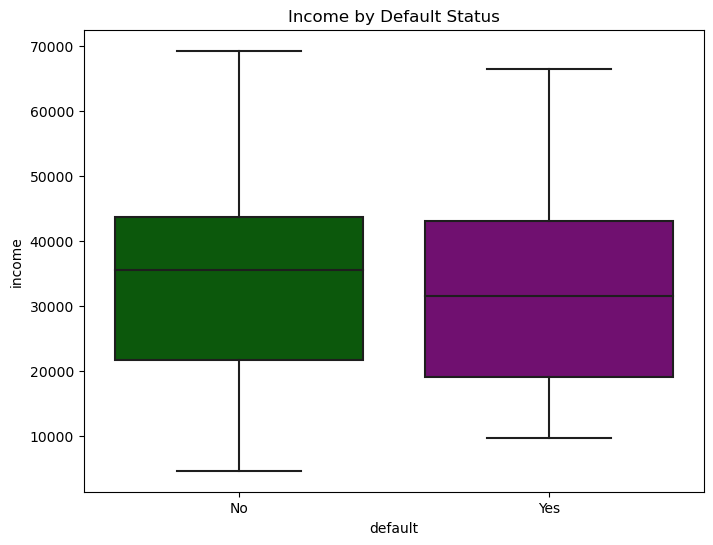

In [5]:
# --- Predicting Credit Card Defaults ---
np.random.seed(1)

# Subset defaulters and non-defaulters
def_yes = default[default['default'] == 'Yes']
def_no = default[default['default'] == 'No']
def_no_sample = def_no.sample(n=333, random_state=1)
def_sub = pd.concat([def_yes, def_no_sample])

# Scatter plot: income vs balance colored by default
plt.figure(figsize=(10, 6))
plt.scatter(def_sub['balance'], def_sub['income'],
            c=['darkgreen' if d == 'No' else 'purple' for d in def_sub['default']],
            marker='o')
plt.axvline(def_sub['balance'].mean(), color='red')
plt.axhline(40000, color='red')
plt.xlabel('Balance')
plt.ylabel('Income')
plt.title('Income vs Balance by Default Status')
plt.show()

# Boxplots for balance and income by default
plt.figure(figsize=(8, 6))
sns.boxplot(x='default', y='balance', data=def_sub, palette=['darkgreen', 'purple'])
plt.title('Balance by Default Status')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='default', y='income', data=def_sub, palette=['darkgreen', 'purple'])
plt.title('Income by Default Status')
plt.show()

#### Comparing nested models 

In [8]:

# ANOVA for balance ~ default
model_balance = ols('balance ~ default', data=def_sub).fit()
anova_balance = sm.stats.anova_lm(model_balance, typ=2)
print("\nANOVA for balance ~ default:")
print(anova_balance)

# ANOVA for income ~ default
model_income = ols('income ~ default', data=def_sub).fit()
anova_income = sm.stats.anova_lm(model_income, typ=2)
print("\nANOVA for income ~ default:")
print(anova_income)


ANOVA for balance ~ default:
                sum_sq     df           F         PR(>F)
default   1.464646e+08    1.0  929.294599  2.539812e-128
Residual  1.046520e+08  664.0         NaN            NaN

ANOVA for income ~ default:
                sum_sq     df         F   PR(>F)
default   4.458949e+08    1.0  2.424994  0.11989
Residual  1.220928e+11  664.0       NaN      NaN
